In [28]:
import numpy as np
import pandas as pd


In [15]:
df = pd.read_csv('spam.csv', encoding =('ISO-8859-1')) # encoding add kri kyuki utf 8 error show kr rha tha

In [16]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
776,ham,Why don't you go tell your friend you're not s...,NaN,NaN,NaN
2265,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1192,ham,I was up all night too worrying about this app...,NaN,NaN,NaN
1985,ham,The length is e same but e top shorter n i got...,NaN,NaN,NaN
3205,ham,At home also.,NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [21]:
df.sample(5)

,v1,v2
4247,spam,"accordingly. I repeat, just text the word ok o..."
1409,ham,Where at were hungry too
833,ham,Thank you so much. When we skyped wit kz and s...
3734,ham,"ItÛ÷s å£6 to get in, is that ok?"
1484,ham,"Sorry, I'll call later"


In [22]:
#renaming columns 
df.rename(columns={'v1':'target','v2':'mssg'}, inplace = True)

In [23]:
df.sample(5)

,target,mssg
5166,ham,Y she dun believe leh? I tot i told her it's t...
2732,ham,How dare you stupid. I wont tell anything to y...
668,ham,Have a good evening! Ttyl
2146,ham,So can collect ur laptop?
2407,ham,Solve d Case : A Man Was Found Murdered On &l...


In [37]:
!pip install scikit-learn ## to instal any missing library

     ---------------------------------------- 7.1/7.1 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 3.8 MB/s eta 0:00:00


In [39]:
import sklearn

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()

In [48]:
df['target'] = encoder.fit_transform(df['target'])

In [51]:
df.sample(5)

,target,mssg
5508,0,"Machan you go to gym tomorrow, i wil come lat..."
2265,0,I cant pick the phone right now. Pls send a me...
3121,1,Free entry in 2 a weekly comp for a chance to ...
181,0,Lol no. U can trust me.
2879,1,Last Chance! Claim ur å£150 worth of discount ...


In [53]:
df.isnull().sum()

target    0
mssg      0
dtype: int64

In [54]:
df.duplicated().sum()

403

In [55]:
df = df.drop_duplicates(keep = 'first')

In [57]:
df.shape

(5169, 2)

In [58]:
df.duplicated().sum()


0

In [59]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [62]:
import matplotlib.pyplot as plt

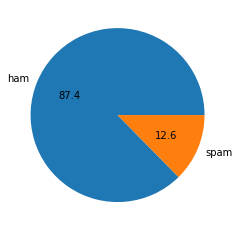

In [70]:
plt.pie(df['target'].value_counts(), labels=['ham' , 'spam'], autopct ="%0.1f")
plt.show()

In [74]:
!pip install nltk


In [137]:
import nltk## import krna padta h after installing


In [139]:
from nltk.corpus import stopwords 
stopwords

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [80]:
df['num_characters']= df['mssg'].apply(len)

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df.sample(6)

,target,mssg,num_characters
3811,0,Yep then is fine 7.30 or 8.30 for ice age.,42
1385,0,That's ok. I popped in to ask bout something a...,115
4403,0,"Sorry, I'll call later &lt;#&gt; mins",38
2113,0,"Yeah, don't go to bed, I'll be back before mid...",51
2919,0,"Thanx 4 the time weåÕve spent 2geva, its bin m...",86
474,0,Nice line said by a broken heart- Plz don't cu...,125


In [86]:
#num of words
df['num_words'] = df['mssg'].apply(lambda x:len(nltk.word_tokenize(x)))

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
df.sample()

,target,mssg,num_characters,num_words
3176,0,In meeting da. I will call you,30,8


In [89]:
df['num_sentences'] =df['mssg'].apply(lambda x:len(nltk.sent_tokenize(x)))

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df.sample(9)

,target,mssg,num_characters,num_words,num_sentences
2455,0,"Abeg, make profit. But its a start. Are you us...",88,22,3
378,0,Keep my payasam there if rinu brings,36,7,1
3202,0,Haha... Yup hopefully we will lose a few kg b...,97,22,2
863,0,Did u find out what time the bus is at coz i n...,73,19,1
1347,0,She doesnt need any test.,25,6,1
4212,0,I attended but nothing is there.,32,7,1
2161,0,Is she replying. Has boye changed his phone nu...,50,10,2
4555,0,Gettin rdy to ship comp,23,5,1
5107,0,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...,57,15,1


In [92]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [93]:
df[df['target']==0 ][['num_characters','num_words', 'num_sentences']].describe() ## for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [94]:
df[df['target']==1 ][['num_characters','num_words', 'num_sentences']].describe() ## for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [96]:
import seaborn as sns

<AxesSubplot:xlabel='num_words', ylabel='Count'>

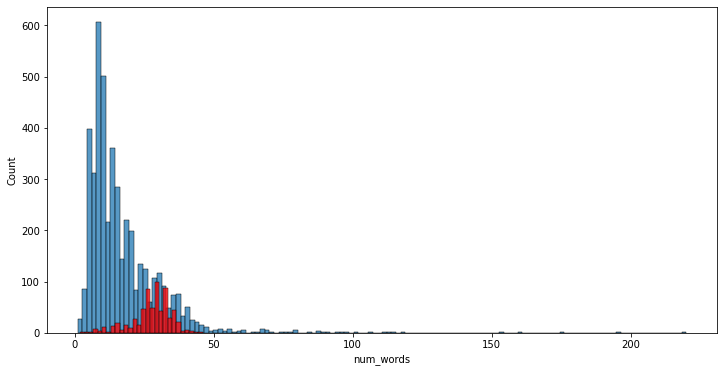

In [106]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

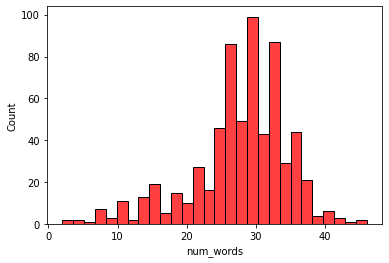

In [98]:
sns.histplot(df[df['target']==1]['num_words'], color='red')

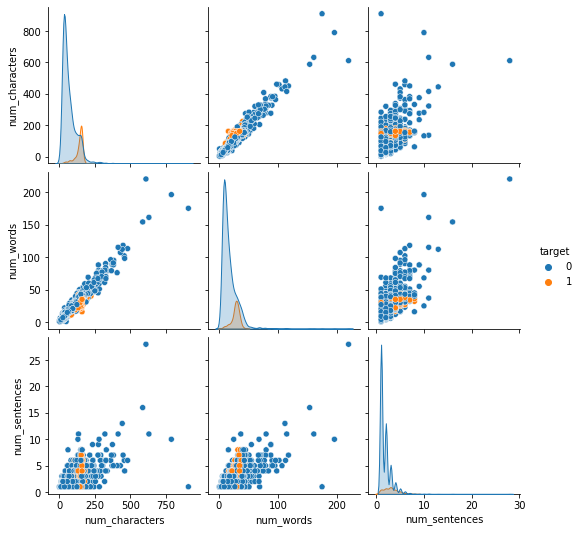

In [107]:
sns.pairplot(df,hue='target')

In [108]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

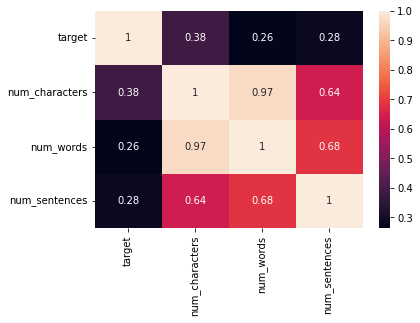

In [110]:
sns.heatmap(df.corr(), annot =True)

In [111]:
## multicollinearity in model so we take only one of word sent amd char 
## so we keep num character as it has max correlation

In [112]:
## DATA PREPROCESSING
##lower case
##tokenisation
#remove speciaal characters
#remove punctuation and stop words
#stemming

In [156]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [158]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
ps.stem('flexing')

'flex'

In [162]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [163]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text: 
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
    
           
    return " ".join(y)

In [165]:
transform_text('HelLLooOO GaIzzZ  &76^5%% %%% )0')

'hellloooo gaizzz 0'

In [166]:
df['mssg'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: mssg, Length: 5169, dtype: object

In [168]:
df['transformed_text']=df['mssg'].apply(transform_text)

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
df.sample(6)

,target,mssg,num_characters,num_words,num_sentences,transformed_text
3437,0,Its good to hear from you,25,6,1,good hear
3898,0,ÌÏ mean it's confirmed... I tot they juz say o...,63,16,2,ìï mean confirm tot juz say oni ok
1371,0,I though we shd go out n have some fun so bar ...,80,20,1,though shd go n fun bar town someth sound ok
3358,1,Sorry I missed your call let's talk when you h...,78,18,2,sorri miss call let talk time 07090201529
1754,0,How is your schedule next week? I am out of to...,62,15,2,schedul next week town weekend
5348,0,Do I? I thought I put it back in the box,40,12,2,thought put back box


In [171]:
# wordcloud
!pip install wordcloud

     ------------------------------------- 154.6/154.6 kB 28.5 kB/s eta 0:00:00


In [175]:
from wordcloud import WordCloud

In [177]:
wc = WordCloud(width=800, height = 800, background_color = 'white', min_font_size=20)
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

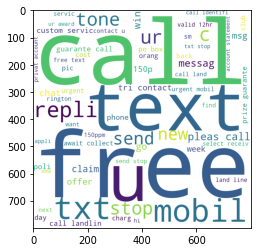

In [178]:
plt.imshow(spam_wc)

<Figure size 1080x576 with 0 Axes>

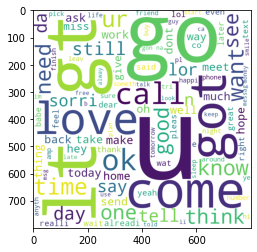

<Figure size 1080x576 with 0 Axes>

In [180]:
wc = WordCloud(width=800, height = 800, background_color = 'white', min_font_size=20)
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.figure(figsize=(15,8))

In [181]:
df.head()

,target,mssg,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [186]:
spam_corpus = []

for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [192]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


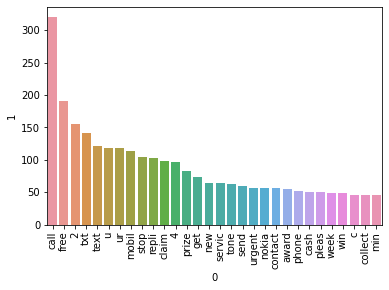

In [198]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [204]:
ham_corpus = []

for msg in df[df['target']== 0]['transformed_text'].tolist():
              for word in msg.split():
                    ham_corpus.append(word)

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

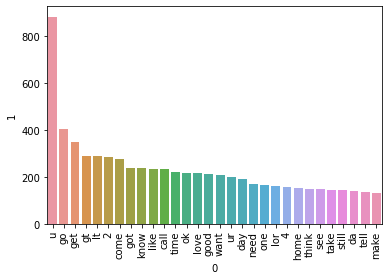

In [208]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [209]:
# naive bayes best for textual data

In [210]:
#model building 

In [226]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [227]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [228]:
X.shape

(5169, 6708)

In [229]:
y =df['target'].values

In [230]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [231]:
from sklearn.model_selection import train_test_split


In [232]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =42)

In [233]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB 
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [234]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [235]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [236]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [237]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [238]:
# so we chose Tfidf in MNB with max precision